In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.model_selection import GridSearchCV

In [4]:
import warnings; warnings.simplefilter('ignore')

In [5]:
# multi-class classification with Keras using sk-learn
from keras.wrappers.scikit_learn import KerasClassifier

import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.utils import np_utils

import tensorflow as tf

In [6]:
from numpy import mean
from numpy import std

In [7]:
data1 = pd.read_csv('Exp3_DataOutput(Var).csv')
data1.shape

(799, 44)

In [8]:
data1.head()

,Unnamed: 0,TS,TC,GH,H/D,Hostelite-S,OnBus-S,OnLocalBus-S,PI-S,HI-S,...,SS_4,Matric-Marks-Bin_75-80,Matric-Marks-Bin_80-85,Matric-Marks-Bin_85-90,Intermediate-Marks-Bin_70-75,Intermediate-Marks-Bin_75-80,Att_CreditHrs-Semester-Bin_15-20,Age_21,Age_22,Class
0,0,0,0,1,1,0,0,0,1,1,...,1,0,0,1,1,0,0,0,0,Bad
1,1,0,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,Bad
2,2,0,1,0,1,1,1,1,1,0,...,0,0,0,1,0,1,1,0,0,Average
3,3,0,0,1,1,1,0,1,1,1,...,0,0,1,0,0,0,1,0,0,Bad
4,4,0,0,1,0,0,1,1,1,0,...,1,1,0,0,1,0,1,0,0,Bad


In [9]:
data1 = data1.drop('Unnamed: 0', axis = 1)
data1.shape

(799, 43)

In [10]:
x1 = data1.drop(['Class'], axis=1)
x1 = x1.astype('int64')
x1 = x1.values
print(x1)

[[0 0 1 ... 0 0 0]
 [0 0 1 ... 1 0 0]
 [0 1 0 ... 1 0 0]
 ...
 [0 1 1 ... 0 1 0]
 [1 0 0 ... 0 1 0]
 [0 0 1 ... 0 0 0]]


In [11]:
y1 = data1['Class']
y1 = y1.values
print(y1)

['Bad' 'Bad' 'Average' 'Bad' 'Bad' 'Bad' 'Bad' 'Good' 'Bad' 'Average'
 'Average' 'Average' 'Bad' 'Average' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad'
 'Average' 'Bad' 'Average' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad' 'Bad'
 'Average' 'Bad' 'Average' 'Average' 'Good' 'Bad' 'Bad' 'Good' 'Average'
 'Good' 'Good' 'Average' 'Average' 'Good' 'Good' 'Average' 'Good' 'Good'
 'Good' 'Average' 'Average' 'Good' 'Average' 'Average' 'Good' 'Good'
 'Average' 'Good' 'Good' 'Average' 'Bad' 'Average' 'Average' 'Average'
 'Average' 'Average' 'Good' 'Bad' 'Average' 'Bad' 'Good' 'Good' 'Average'
 'Bad' 'Average' 'Good' 'Average' 'Average' 'Good' 'Average' 'Average'
 'Good' 'Good' 'Average' 'Average' 'Average' 'Average' 'Good' 'Good'
 'Average' 'Average' 'Average' 'Average' 'Good' 'Average' 'Average' 'Bad'
 'Average' 'Average' 'Average' 'Average' 'Good' 'Average' 'Bad' 'Average'
 'Average' 'Good' 'Bad' 'Good' 'Average' 'Average' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Bad' 'Good' 'Bad' 'Average' 'Bad'
 'G

In [12]:
print(x1.shape)
print(y1.shape)

(799, 42)
(799,)


In [13]:
#SMOTE output of Varience Threshold
data2 = pd.read_csv('Exp3_DataOutput(VarS).csv')
data2.shape

(1428, 38)

In [14]:
data2.head()

,Unnamed: 0,GH,H/D,Hostelite-S,OnBus-S,OnLocalBus-S,PI-S,HI-S,SG-S,MF-S,...,EG_12 Years of Study,SS_3,SS_4,Matric-Marks-Bin_75-80,Matric-Marks-Bin_85-90,Intermediate-Marks-Bin_70-75,Att_CreditHrs-Semester-Bin_15-20,Age_21,Age_22,Class
0,0,1,1,0,0,0,1,1,1,1,...,0,0,1,0,1,1,0,0,0,Bad
1,1,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,1,0,0,Bad
2,2,0,1,1,1,1,1,0,1,1,...,1,1,0,0,1,0,1,0,0,Average
3,3,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,Bad
4,4,1,0,0,1,1,1,0,1,1,...,0,0,1,1,0,1,1,0,0,Bad


In [15]:
data2 = data2.drop('Unnamed: 0', axis = 1)
data2.shape

(1428, 37)

In [16]:
X_S = data2.drop(['Class'], axis=1)
X_S = X_S.astype('int64')
X_S = X_S.values
print(X_S)

[[1 1 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 [0 1 1 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 1 0 0]
 [1 0 0 ... 0 1 0]]


In [17]:
y_S = data2['Class']
y_S = y_S.values
print(y_S)

['Bad' 'Bad' 'Average' ... 'Good' 'Good' 'Good']


In [18]:
print(x1.shape)
print(y1.shape)

(799, 42)
(799,)


In [19]:
print(X_S.shape)
print(y_S.shape)

(1428, 36)
(1428,)


In [20]:
#Stratified K Fold split
kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
print(kfold)

StratifiedKFold(n_splits=10, random_state=1, shuffle=True)


In [21]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.20, random_state = 5)
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_S, y_S, test_size = 0.20, random_state = 5)

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(639, 42)
(639,)
(160, 42)
(160,)


In [23]:
print(X_train_S.shape)
print(y_train_S.shape)
print(X_test_S.shape)
print(y_test_S.shape)

(1142, 36)
(1142,)
(286, 36)
(286,)


In [24]:
#for LSTM
#For training LSTM (label encoder + shape)
encoder = LabelEncoder()
y_train_L = y_train #for grid Search
encoder.fit(y_train_L)
y_train_L1 = encoder.transform(y_train_L) #for sparse_categorical
y_train_L2 = np_utils.to_categorical(y_train_L1) #for categorical

encoder = LabelEncoder()
y_train_S_L = y_train_S
encoder.fit(y_train_S_L)
y_train_S_L1 = encoder.transform(y_train_S_L)
y_train_S_L2 = np_utils.to_categorical(y_train_S_L1)

X_train_L = X_train.reshape((-1, 1, X_train.shape[1]))
X_train_S_L = X_train_S.reshape((-1, 1, X_train_S.shape[1]))

In [25]:
#For testing LSTM (label encoder + shape)
encoder = LabelEncoder()
y_test_L = y_test
encoder.fit(y_test_L)
y_test_L1 = encoder.transform(y_test_L)
y_test_L2 = np_utils.to_categorical(y_test_L1)

encoder = LabelEncoder()
y_test_S_L = y_test_S
encoder.fit(y_test_S_L)
y_test_S_L1 = encoder.transform(y_test_S_L)
y_test_S_L2 = np_utils.to_categorical(y_test_S_L1)

X_test_L = X_test.reshape((-1, 1, X_test.shape[1]))
X_test_S_L = X_test_S.reshape((-1, 1, X_test_S.shape[1]))

In [26]:
print(X_train_L.shape)
print(y_train_L.shape)
print(X_test_L.shape)
print(y_test_L.shape)

(639, 1, 42)
(639,)
(160, 1, 42)
(160,)


In [27]:
print(X_train_S_L.shape)
print(y_train_S_L.shape)
print(X_test_S_L.shape)
print(y_test_S_L.shape)

(1142, 1, 36)
(1142,)
(286, 1, 36)
(286,)


# SVM with HT

In [92]:
#Without SMOTE
model = SVC(random_state = 0) 

parameters = [{'C': [0.01,0.1,1,2], 'kernel': ['rbf', 'linear'], 'gamma':[0.01,0.1,1]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Results with Grid Search:
0.7793154761904761
{'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}

Accuracy Score  on test data: 0.78125
[[91  3  7]
 [17  4  0]
 [ 8  0 30]]
              precision    recall  f1-score   support

     Average       0.78      0.90      0.84       101
         Bad       0.57      0.19      0.29        21
        Good       0.81      0.79      0.80        38

    accuracy                           0.78       160
   macro avg       0.72      0.63      0.64       160
weighted avg       0.76      0.78      0.76       160



In [91]:
#With SMOTE
model = SVC(random_state = 0) 

parameters = [{'C': [0.01,0.1,1,2], 'kernel': ['rbf', 'linear'], 'gamma':[0.01,0.1,1]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred_S = grid_search.predict(X_test_S)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test_S, y_pred_S)))
print(confusion_matrix(y_test_S,y_pred_S))
print(classification_report(y_test_S,y_pred_S))

Best Results with Grid Search:
0.847620137299771
{'C': 2, 'gamma': 0.1, 'kernel': 'rbf'}

Accuracy Score  on test data: 0.8846153846153846
[[69 10  8]
 [ 7 88  1]
 [ 7  0 96]]
              precision    recall  f1-score   support

     Average       0.83      0.79      0.81        87
         Bad       0.90      0.92      0.91        96
        Good       0.91      0.93      0.92       103

    accuracy                           0.88       286
   macro avg       0.88      0.88      0.88       286
weighted avg       0.88      0.88      0.88       286



In [93]:
print('Test Accuracy with Grid Search CV:')
print('>Accuracy Score  without SMOTE: %.3f' % (accuracy_score(y_test, y_pred)))
print('>Accuracy Score  with SMOTE: %.3f' % (accuracy_score(y_test_S, y_pred_S)))

Test Accuracy with Grid Search CV:
>Accuracy Score  without SMOTE: 0.781
>Accuracy Score  with SMOTE: 0.885


# DT with HT

In [66]:
#Without SMOTE
model = DecisionTreeClassifier(random_state=0)

parameters = [{'min_samples_split': [2,5,10], 'min_samples_leaf': [1,2,4], 'splitter': ['best','random'],
              'criterion': ['gini', 'entropy']}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Results with Grid Search:
0.7292410714285714
{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'best'}

Accuracy Score  on test data: 0.725
[[84  4 13]
 [13  7  1]
 [11  2 25]]
              precision    recall  f1-score   support

     Average       0.78      0.83      0.80       101
         Bad       0.54      0.33      0.41        21
        Good       0.64      0.66      0.65        38

    accuracy                           0.73       160
   macro avg       0.65      0.61      0.62       160
weighted avg       0.71      0.72      0.72       160



In [67]:
#With SMOTE
model = DecisionTreeClassifier(random_state=0)

parameters = [{'min_samples_split': [2,5,10], 'min_samples_leaf': [1,2,4], 'splitter': ['best','random'],
              'criterion': ['gini', 'entropy']}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred_S = grid_search.predict(X_test_S)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test_S, y_pred_S)))
print(confusion_matrix(y_test_S,y_pred_S))
print(classification_report(y_test_S,y_pred_S))

Best Results with Grid Search:
0.7985278413424867
{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

Accuracy Score  on test data: 0.8321678321678322
[[65 18  4]
 [ 8 84  4]
 [10  4 89]]
              precision    recall  f1-score   support

     Average       0.78      0.75      0.76        87
         Bad       0.79      0.88      0.83        96
        Good       0.92      0.86      0.89       103

    accuracy                           0.83       286
   macro avg       0.83      0.83      0.83       286
weighted avg       0.83      0.83      0.83       286



In [68]:
print('Test Accuracy with Grid Search CV:')
print('>Accuracy Score  without SMOTE: %.3f' % (accuracy_score(y_test, y_pred)))
print('>Accuracy Score  with SMOTE: %.3f' % (accuracy_score(y_test_S, y_pred_S)))

Test Accuracy with Grid Search CV:
>Accuracy Score  without SMOTE: 0.725
>Accuracy Score  with SMOTE: 0.832


# RF with HT

In [103]:
#Without SMOTE
model = RandomForestClassifier(random_state=0)

parameters = [{'n_estimators': [100, 150, 200], 'min_samples_split':[2,3,4],
              'min_samples_leaf':[2,3,4]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Results with Grid Search:
0.7715525793650794
{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy Score  on test data: 0.775
[[95  1  5]
 [19  2  0]
 [11  0 27]]
              precision    recall  f1-score   support

     Average       0.76      0.94      0.84       101
         Bad       0.67      0.10      0.17        21
        Good       0.84      0.71      0.77        38

    accuracy                           0.78       160
   macro avg       0.76      0.58      0.59       160
weighted avg       0.77      0.78      0.74       160



In [101]:
#With SMOTE
model = RandomForestClassifier(random_state=0)

parameters = [{'n_estimators': [120, 150, 200], 'min_samples_split':[2,3,4],
              'min_samples_leaf':[2,3,4]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred_S = grid_search.predict(X_test_S)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test_S, y_pred_S)))
print(confusion_matrix(y_test_S,y_pred_S))
print(classification_report(y_test_S,y_pred_S))

Best Results with Grid Search:
0.8510831426392068
{'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 120}

Accuracy Score  on test data: 0.8881118881118881
[[67 12  8]
 [ 6 88  2]
 [ 3  1 99]]
              precision    recall  f1-score   support

     Average       0.88      0.77      0.82        87
         Bad       0.87      0.92      0.89        96
        Good       0.91      0.96      0.93       103

    accuracy                           0.89       286
   macro avg       0.89      0.88      0.88       286
weighted avg       0.89      0.89      0.89       286



In [104]:
print('Test Accuracy with Grid Search CV:')
print('>Accuracy Score  without SMOTE: %.3f' % (accuracy_score(y_test, y_pred)))
print('>Accuracy Score  with SMOTE: %.3f' % (accuracy_score(y_test_S, y_pred_S)))

Test Accuracy with Grid Search CV:
>Accuracy Score  without SMOTE: 0.775
>Accuracy Score  with SMOTE: 0.888


# NB with HT

GaussianNB only accepts priors (arrray-like, shape(n_classes)) as an argument so unless you have some priors to set for your model ahead of time you will have nothing to grid search over.

In [28]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('>Accuracy Score  without SMOTE: %.3f' % (accuracy_score(y_test, y_pred)))
    
model = GaussianNB()
model.fit(X_train_S, y_train_S)
y_pred_S = model.predict(X_test_S)
print('>Accuracy Score  with SMOTE: %.3f' % (accuracy_score(y_test_S, y_pred_S)))

>Accuracy Score  without SMOTE: 0.581
>Accuracy Score  with SMOTE: 0.692


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

     Average       0.67      0.69      0.68       101
         Bad       0.50      0.33      0.40        21
        Good       0.39      0.42      0.41        38

    accuracy                           0.58       160
   macro avg       0.52      0.48      0.49       160
weighted avg       0.58      0.58      0.58       160



In [30]:
print(classification_report(y_test_S,y_pred_S))

              precision    recall  f1-score   support

     Average       0.62      0.61      0.62        87
         Bad       0.73      0.72      0.73        96
        Good       0.71      0.74      0.72       103

    accuracy                           0.69       286
   macro avg       0.69      0.69      0.69       286
weighted avg       0.69      0.69      0.69       286



# MLP (Sklearn)

#### Without SMOTE 

In [39]:
#Perceptron Tuning
model = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(5,5,5),(10,10,10),(15,15,15),(20,20,20),(25,25,25),(30,30,30),(35,35,35),(40,40,40),(45,45,45),(50,50,50),(55,55,55),(60,60,60),(65,65,65),(70,70,70),(75,75,75),(80,80,80),(85,85,85),(90,90,90),(95,95,95),(100,100,100)],
    #'activation': ['relu'], default
    #'solver': ['adam'], default
    #'alpha': [0.0001], default
    #'learning_rate': ['constant'], default
    #'max_iter': [200], default
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.760515873015873
{'hidden_layer_sizes': (95, 95, 95)}


In [40]:
xaxis_perceptrons = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

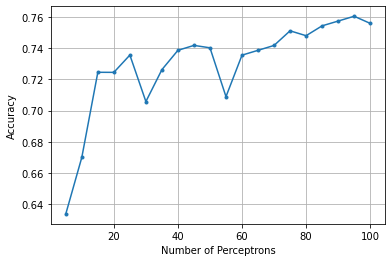

In [41]:
plt.plot(xaxis_perceptrons,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfPerceptron.png")
plt.show()

In [42]:
#Layer Tuning
model = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(95),(95,95),(95,95,95),(95,95,95,95),(95,95,95,95,95),(95,95,95,95,95,95),(95,95,95,95,95,95,95),(95,95,95,95,95,95,95,95),(95,95,95,95,95,95,95,95,95),(95,95,95,95,95,95,95,95,95,95),(95,95,95,95,95,95,95,95,95,95,95),(95,95,95,95,95,95,95,95,95,95,95,95)],
    #'activation': ['relu'], default
    #'solver': ['adam'], default
    #'alpha': [0.0001], default
    #'learning_rate': ['constant'], default
    #'max_iter': [200], default
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.7573660714285715
{'hidden_layer_sizes': (95, 95, 95)}


In [43]:
xaxis_layers = [1,2,3,4,5,6,7,8,9,10,11,12]

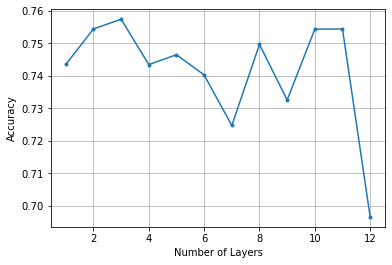

In [44]:
plt.plot(xaxis_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Layers')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfLayers.png")
plt.show()

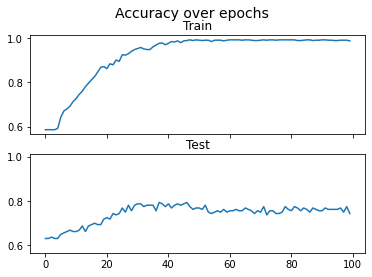

In [45]:
#for Epochs and Batch Size with MLP
model = MLPClassifier(hidden_layer_sizes=[95,95,95,95])

N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 100
N_BATCH = 200
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    # SHUFFLING
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        model.partial_fit(X_train[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(model.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(model.score(X_test, y_test))

    epoch += 1

""" Plot """
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.savefig("GridSearchCV Screenshots/Exp3/Epochs.png")
plt.show()

In [77]:
#Tuning with Grid Seaerch CV
model = MLPClassifier(random_state=0)

parameters = {
    'hidden_layer_sizes': [(93,93,93), (95,95,95), (97,97,97)],
    'activation': ['relu','tanh'], 
    'solver': ['adam','sgd'], 
    'alpha': [0.001,0.01,0.1],
    'max_iter': [100,200]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train, y_train)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test, y_pred)))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Best Results with Grid Search:
0.7684523809523809
{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (93, 93, 93), 'max_iter': 100, 'solver': 'adam'}

Accuracy Score  on test data: 0.725
[[80  9 12]
 [12  9  0]
 [10  1 27]]
              precision    recall  f1-score   support

     Average       0.78      0.79      0.79       101
         Bad       0.47      0.43      0.45        21
        Good       0.69      0.71      0.70        38

    accuracy                           0.73       160
   macro avg       0.65      0.64      0.65       160
weighted avg       0.72      0.72      0.72       160



In [48]:
from sklearn.metrics import roc_curve, auc
from scipy import interp

n_classes = 3  #number of class

model = MLPClassifier(random_state=0, activation = 'relu', alpha = 0.001, hidden_layer_sizes = (93, 93, 93), max_iter = 100, solver = 'adam')

model.fit(X_train, y_train_L2)

y_score_L = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_L2[:, i], y_score_L[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_L2.ravel(), y_score_L.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

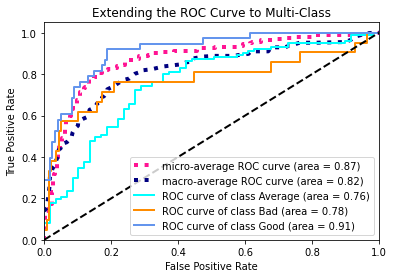

In [50]:
# Process of plotting roc-auc curve belonging to all classes.

n_class_labels = ['Average', 'Bad', 'Good']
lw = 2 # line_width

from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class %s (area = {1:0.2f})'
             ''.format(i, roc_auc[i]) %n_class_labels[i])

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.savefig("GridSearchCV Screenshots/Exp3/AUC_MLP_Multi.png")
plt.show()

#### With SMOTE 

In [51]:
#With SMOTE
model = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(5,5,5),(10,10,10),(15,15,15),(20,20,20),(25,25,25),(30,30,30),(35,35,35),(40,40,40),(45,45,45),(50,50,50),(55,55,55),(60,60,60),(65,65,65),(70,70,70),(75,75,75),(80,80,80),(85,85,85),(90,90,90),(95,95,95),(100,100,100)],
    #'activation': ['relu'], default
    #'solver': ['adam'], default
    #'alpha': [0.0001], default
    #'learning_rate': ['constant'], default
    #'max_iter': [200], default
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.8344469870327995
{'hidden_layer_sizes': (90, 90, 90)}


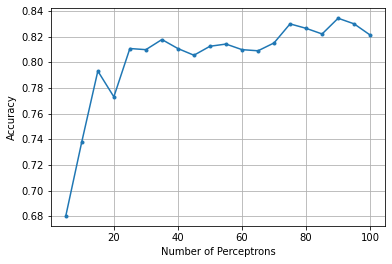

In [52]:
plt.plot(xaxis_perceptrons,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfPerceptron_S.png")
plt.show()

In [53]:
#Layer Tuning
model = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(90),(90,90),(90,90,90),(90,90,90,90),(90,90,90,90,90),(90,90,90,90,90,90),(90,90,90,90,90,90,90),(90,90,90,90,90,90,90,90),(90,90,90,90,90,90,90,90,90),(90,90,90,90,90,90,90,90,90,90),(90,90,90,90,90,90,90,90,90,90,90),(90,90,90,90,90,90,90,90,90,90,90,90)],
    #'activation': ['relu'], default
    #'solver': ['adam'], default
    #'alpha': [0.0001], default
    #'learning_rate': ['constant'], default
    #'max_iter': [200], default
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.8370633104500381
{'hidden_layer_sizes': (90, 90, 90, 90)}


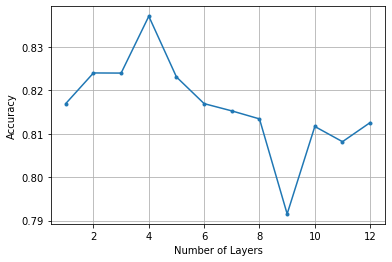

In [54]:
plt.plot(xaxis_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Layers')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfLayers_S.png")
plt.show()

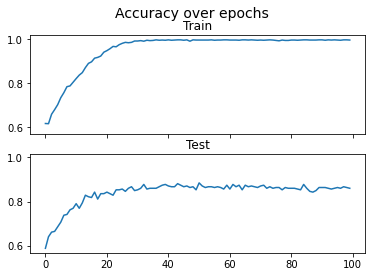

In [55]:
#for Epochs and Batch Size with MLP
model = MLPClassifier(hidden_layer_sizes=[90,90,90,90])

N_TRAIN_SAMPLES = X_train_S.shape[0]
N_EPOCHS = 100
N_BATCH = 200
N_CLASSES = np.unique(y_train_S)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    # SHUFFLING
    random_perm = np.random.permutation(X_train_S.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        model.partial_fit(X_train_S[indices], y_train_S[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(model.score(X_train_S, y_train_S))

    # SCORE TEST
    scores_test.append(model.score(X_test_S, y_test_S))

    epoch += 1

""" Plot """
fig, ax = plt.subplots(2, sharex=True, sharey=True)
ax[0].plot(scores_train)
ax[0].set_title('Train')
ax[1].plot(scores_test)
ax[1].set_title('Test')
fig.suptitle("Accuracy over epochs", fontsize=14)
plt.savefig("GridSearchCV Screenshots/Exp3/Epochs_S.png")
plt.show()

In [78]:
#Tuning with Grid Seaerch CV
model = MLPClassifier(random_state=0)

parameters = {
    'hidden_layer_sizes': [(87,87,87,87), (90,90,90,90), (93,93,93,93)],
    'activation': ['relu','tanh'], 
    'solver': ['adam','sgd'], 
    'alpha': [0.001,0.01,0.1],
    'max_iter': [100,200]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs = -1)

grid_search = grid_search.fit(X_train_S, y_train_S)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred_S = grid_search.predict(X_test_S)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test_S, y_pred_S)))
print(confusion_matrix(y_test_S,y_pred_S))
print(classification_report(y_test_S,y_pred_S))

Best Results with Grid Search:
0.8379328756674294
{'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (93, 93, 93, 93), 'max_iter': 100, 'solver': 'adam'}

Accuracy Score  on test data: 0.8601398601398601
[[67 11  9]
 [ 8 84  4]
 [ 7  1 95]]
              precision    recall  f1-score   support

     Average       0.82      0.77      0.79        87
         Bad       0.88      0.88      0.88        96
        Good       0.88      0.92      0.90       103

    accuracy                           0.86       286
   macro avg       0.86      0.86      0.86       286
weighted avg       0.86      0.86      0.86       286



In [58]:
from scipy import interp

# Learn to predict each class against the other

n_classes = 3  #number of class

model = MLPClassifier(random_state=0, activation = 'tanh', alpha = 0.001, hidden_layer_sizes = (93, 93, 93, 93), max_iter = 100, solver = 'adam')

model.fit(X_train_S, y_train_S_L2)

y_score_L_S = model.predict_proba(X_test_S)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_S_L2[:, i], y_score_L_S[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_S_L2.ravel(), y_score_L_S.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

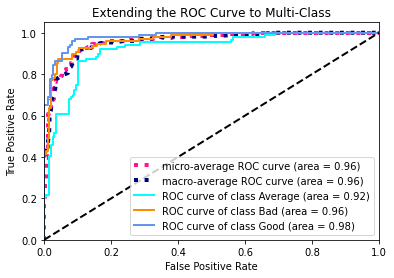

In [60]:
# Process of plotting roc-auc curve belonging to all classes.

n_class_labels = ['Average', 'Bad', 'Good']
lw = 2 # line_width

from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class %s (area = {1:0.2f})'
             ''.format(i, roc_auc[i]) %n_class_labels[i])

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.savefig("GridSearchCV Screenshots/Exp3/AUC_MLP_Multi_S.png")
plt.show()

In [79]:
print('Test Accuracy with Grid Search CV:')
print('>Accuracy Score  without SMOTE: %.3f' % (accuracy_score(y_test, y_pred)))
print('>Accuracy Score  with SMOTE: %.3f' % (accuracy_score(y_test_S, y_pred_S)))

Test Accuracy with Grid Search CV:
>Accuracy Score  without SMOTE: 0.725
>Accuracy Score  with SMOTE: 0.860


### best_score_ 
is the average accuracy of all grid search scores (training), on the other hand 'Accuracy' of each outer cross validation is the predicted results on the base of best_estimator_ (testing).

# LSTM

#### Without SMOTE 

In [63]:
#Perceptron Tuning

def create_model(unit):
    model = Sequential()
    model.add(LSTM(units=unit, input_shape=(1, x1.shape[1]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

parameters = {
    'unit': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    'epochs': [70,100],
    'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.7589037698412698
{'batch_size': 5, 'epochs': 100, 'unit': 80}


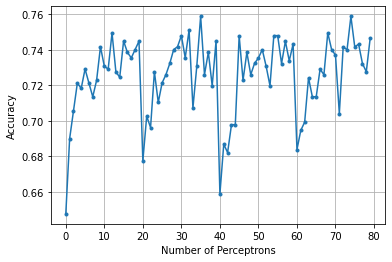

In [64]:
#Results with 80 accuracies (20*2*2)
plt.plot(means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons')
plt.grid()

plt.show()

In [30]:
#Perceptron Tuning

def create_model(unit):
    model = Sequential()
    model.add(LSTM(units=unit, input_shape=(1, x1.shape[1]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 100, batch_size = 5)

parameters = {
    'unit': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    #'epochs': [70,100],
    #'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.7760912698412699
{'unit': 45}


In [31]:
xaxis_perceptrons = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]

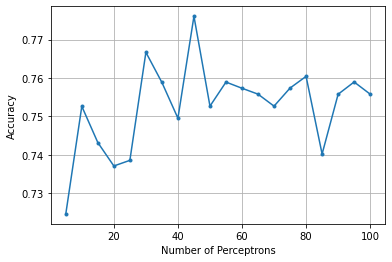

In [32]:
plt.plot(xaxis_perceptrons,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfPerceptron_LSTM.png")
plt.show()

In [33]:
#Layers Tuning for LSTM Layer

def create_model(No_Of_layers):
    model = Sequential()
    
    if No_Of_layers == 1:
        model.add(LSTM(units=45, input_shape=(1, x1.shape[1]), activation='relu'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 2:
        model.add(LSTM(units=45, input_shape=(1, x1.shape[1]), return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=45, activation='relu'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 3:
        model.add(LSTM(units=45, input_shape=(1, x1.shape[1]), return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=45,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=45, activation='relu'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 4:
        model.add(LSTM(units=45, input_shape=(1, x1.shape[1]), return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=45,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=45,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=45, activation='relu'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 5:
        model.add(LSTM(units=45, input_shape=(1, x1.shape[1]), return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=45,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=45,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=45,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=45, activation='relu'))
        model.add(Dropout(0.2))    
    
    # Add an output layer 
    model.add(Dense(3, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 100, batch_size = 5)

parameters = {
    #'unit': [45],
    'No_Of_layers': [1,2,3,4,5]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.7730406746031746
{'No_Of_layers': 2}


In [34]:
xaxis_LSTM_layers = [1,2,3,4,5]

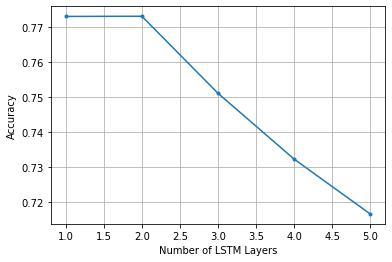

In [35]:
plt.plot(xaxis_LSTM_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of LSTM Layers')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfLayers_LSTM.png")
plt.show()

In [36]:
#Layers Tuning for Dense Layer

def create_model(No_Of_layers):
    model = Sequential()
    # Add an input layer
    model.add(LSTM(units=45, input_shape=(1, x1.shape[1]), activation='relu'))
    model.add(Dropout(0.2))

    for i in range(No_Of_layers):
        model.add(Dense(units=45, activation='relu'))
        model.add(Dropout(0.2))

    # Add an output layer 
    model.add(Dense(3, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 100, batch_size = 5)

parameters = {
    #'unit': [45],
    'No_Of_layers': [0,1,2,3,4,5]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.7635912698412699
{'No_Of_layers': 0}


In [37]:
xaxis_layers = [0,1,2,3,4,5]

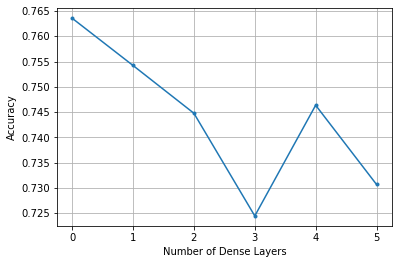

In [38]:
plt.plot(xaxis_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Dense Layers')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfLayers_Dense.png")
plt.show()

In [ ]:
#Perceptron Tuning for Dense Layer (no need to train dense bcz no dense layer)

def create_model(unit):
    model = Sequential()
    model.add(LSTM(units=45, input_shape=(1, x1.shape[1]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=unit, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 100, batch_size = 5)

parameters = {
    'unit': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    #'epochs': [70,100],
    #'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

In [ ]:
plt.plot(xaxis_perceptrons,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons in Dense layer')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfPerceptron_Dense.png")
plt.show()

In [39]:
#Epochs Tuning

def create_model():
    model = Sequential()
    model.add(LSTM(units=45, input_shape=(1, x1.shape[1]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, batch_size = 5)

parameters = {
    #'unit': [45],
    'epochs': [30,40,50,60,70,80,90,100,110,120]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.7714037698412699
{'epochs': 110}


In [40]:
xaxis_epochs = [30,40,50,60,70,80,90,100,110,120]

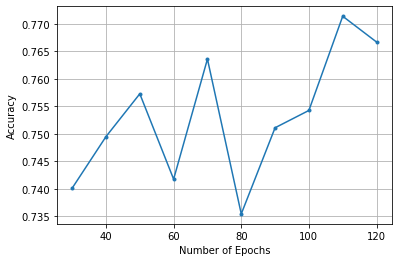

In [41]:
plt.plot(xaxis_epochs,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfEpochs_LSTM.png")
plt.show()

In [42]:
#Batch Size Tuning

def create_model():
    model = Sequential()
    model.add(LSTM(units=45, input_shape=(1, x1.shape[1]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 110)

parameters = {
    #'unit': [45],
    'batch_size': [0,2,5,7,10,12,15,17,20]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.7635912698412699
{'batch_size': 10}


In [43]:
xaxis_batch = [0,2,5,7,10,12,15,17,20]

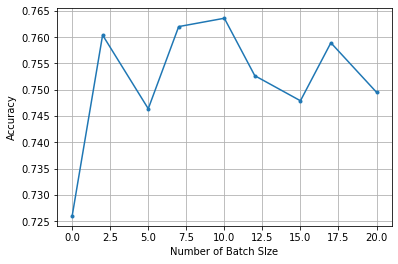

In [44]:
plt.plot(xaxis_batch,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Batch SIze')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfBatch_LSTM.png")
plt.show()

In [45]:
#Tuning with Grid Seaerch CV

def create_model(unit, solver, dropout):
    model = Sequential()
    model.add(LSTM(units=unit, input_shape=(1, x1.shape[1]), activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=solver, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

parameters = {
    'unit': [30,45],
    'dropout': [0.1,0.2],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    'solver': ['adam','Adamax','Nadam'],
    'epochs': [110,120],
    'batch_size': [7,10]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_L, y_train_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test_L)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test_L, y_pred)))
print(confusion_matrix(y_test_L,y_pred))
print(classification_report(y_test_L,y_pred))

Best Results with Grid Search:
0.7714037698412699
{'batch_size': 7, 'dropout': 0.2, 'epochs': 110, 'solver': 'Nadam', 'unit': 30}

Accuracy Score  on test data: 0.75
[[81  6 14]
 [11 10  0]
 [ 8  1 29]]
              precision    recall  f1-score   support

     Average       0.81      0.80      0.81       101
         Bad       0.59      0.48      0.53        21
        Good       0.67      0.76      0.72        38

    accuracy                           0.75       160
   macro avg       0.69      0.68      0.68       160
weighted avg       0.75      0.75      0.75       160



#### With SMOTE

In [78]:
#Perceptron Tuning

def create_model(unit):
    model = Sequential()
    model.add(LSTM(units=unit, input_shape=(1, X_S.shape[1]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

parameters = {
    'unit': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    'epochs': [70,100],
    'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_S_L, y_train_S_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.8528756674294431
{'batch_size': 10, 'epochs': 100, 'unit': 80}


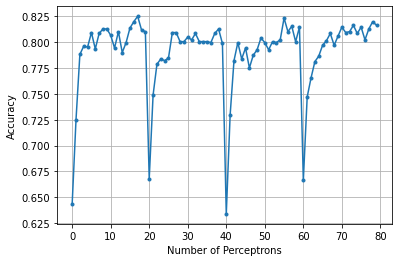

In [93]:
#Results with 80 accuracies (20*2*2)
plt.plot(means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons')
plt.grid()

plt.show()

In [46]:
#Perceptron Tuning

def create_model(unit):
    model = Sequential()
    model.add(LSTM(units=unit, input_shape=(1, X_S.shape[1]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 100, batch_size = 10)

parameters = {
    'unit': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    #'epochs': [70,100],
    #'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_S_L, y_train_S_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.8580778032036613
{'unit': 100}


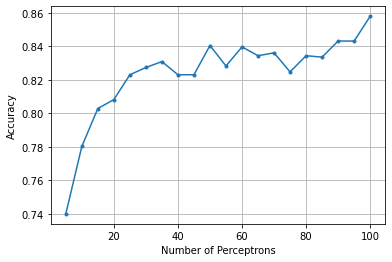

In [47]:
plt.plot(xaxis_perceptrons,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfPerceptron_LSTM_S.png")
plt.show()

In [48]:
#Layers Tuning for LSTM Layer

def create_model(No_Of_layers):
    model = Sequential()
    
    if No_Of_layers == 1:
        model.add(LSTM(units=100, input_shape=(1, X_S.shape[1]), activation='relu'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 2:
        model.add(LSTM(units=100, input_shape=(1,X_S.shape[1]), return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100, activation='relu'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 3:
        model.add(LSTM(units=100, input_shape=(1, X_S.shape[1]), return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100, activation='relu'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 4:
        model.add(LSTM(units=100, input_shape=(1, X_S.shape[1]), return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100, activation='relu'))
        model.add(Dropout(0.2))
    elif No_Of_layers == 5:
        model.add(LSTM(units=100, input_shape=(1, X_S.shape[1]), return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100,  return_sequences = True, activation='relu'))
        model.add(Dropout(0.2))
        model.add(LSTM(units=100, activation='relu'))
        model.add(Dropout(0.2))    
    
    # Add an output layer 
    model.add(Dense(3, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 100, batch_size = 10)

parameters = {
    #'unit': [100],
    'No_Of_layers': [1,2,3,4,5]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_S_L, y_train_S_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.8449580472921433
{'No_Of_layers': 1}


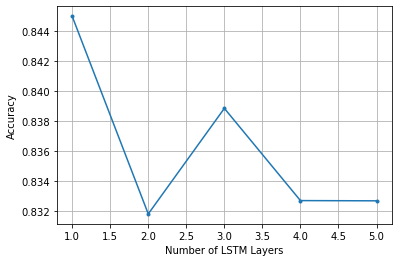

In [49]:
plt.plot(xaxis_LSTM_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of LSTM Layers')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfLayers_LSTM_S.png")
plt.show()

In [50]:
#Layers Tuning for Dense Layer

def create_model(No_Of_layers):
    model = Sequential()
    # Add an input layer
    model.add(LSTM(units=100, input_shape=(1, X_S.shape[1]), activation='relu'))
    model.add(Dropout(0.2))

    for i in range(No_Of_layers):
        model.add(Dense(units=100, activation='relu'))
        model.add(Dropout(0.2))

    # Add an output layer 
    model.add(Dense(3, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 100, batch_size = 10)

parameters = {
    #'unit': [100],
    'No_Of_layers': [0,1,2,3,4,5]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_S_L, y_train_S_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.8432723112128147
{'No_Of_layers': 3}


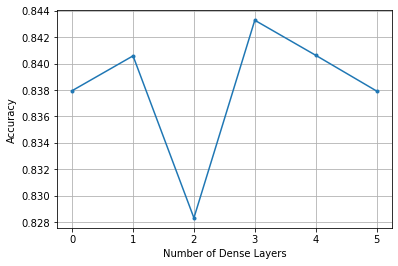

In [51]:
plt.plot(xaxis_layers,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Dense Layers')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfLayers_Dense_S.png")
plt.show()

In [52]:
#Perceptron Tuning for Dense Layer

def create_model(unit):
    model = Sequential()
    model.add(LSTM(units=100, input_shape=(1, X_S.shape[1]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=unit, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=unit, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=unit, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 100, batch_size = 10)

parameters = {
    'unit': [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    #'last_act': ['sigmoid','softmax'],
    #'epochs': [70,100],
    #'batch_size': [5,10] 
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_S_L, y_train_S_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.8467353165522502
{'unit': 65}


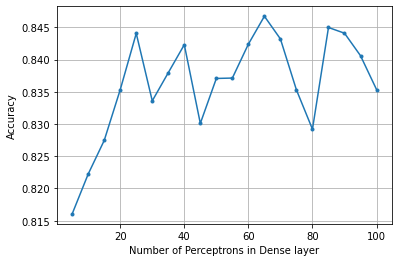

In [53]:
plt.plot(xaxis_perceptrons,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Perceptrons in Dense layer')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfPerceptron_Dense_S.png")
plt.show()

In [54]:
#Epochs Tuning

def create_model():
    model = Sequential()
    # Add an input layer
    model.add(LSTM(units=100, input_shape=(1, X_S.shape[1]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=65, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=65, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=65, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, batch_size = 10)

parameters = {
    #'unit': [100],
    'epochs': [30,40,50,60,70,80,90,100,110,120]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_S_L, y_train_S_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.8432341723874904
{'epochs': 70}


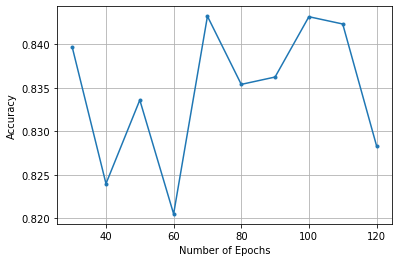

In [55]:
plt.plot(xaxis_epochs,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfEpochs_LSTM_S.png")
plt.show()

In [56]:
#Batch Size Tuning

def create_model():
    model = Sequential()
    # Add an input layer
    model.add(LSTM(units=100, input_shape=(1, X_S.shape[1]), activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=65, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=65, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=65, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0, epochs = 70)

parameters = {
    #'unit': [100],
    'batch_size': [0,2,5,7,10,12,15,17,20]
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_S_L, y_train_S_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

Best Results with Grid Search:
0.8449885583524027
{'batch_size': 5}


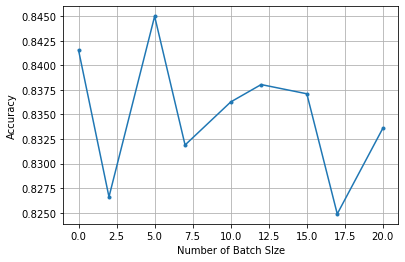

In [57]:
plt.plot(xaxis_batch,means,'.-')
plt.ylabel('Accuracy')
plt.xlabel('Number of Batch SIze')
plt.grid()

plt.savefig("GridSearchCV Screenshots/Exp3/No.OfBatch_LSTM_S.png")
plt.show()

In [58]:
#Tuning with Grid Seaerch CV

def create_model(unit,dropout,solver):
    model = Sequential()
    model.add(LSTM(units=unit, input_shape=(1, X_S.shape[1]), activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(units=65, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(units=65, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(units=65, activation='relu'))
    model.add(Dropout(dropout))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=solver, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)

parameters = {
    'unit': [95,100],
    'dropout': [0.1,0.2],
    #'activation': ['relu','tanh'], 
    #'solver': ['adam','sgd'], 
    'solver': ['adam','Nadam'], 
    'epochs': [70,100],
    'batch_size': [0,5]      
}

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10, n_jobs=-1)

grid_search = grid_search.fit(X_train_S_L, y_train_S_L)

print('Best Results with Grid Search:')
print(grid_search.best_score_)
print(grid_search.best_params_)

y_pred_S = grid_search.predict(X_test_S_L)

print('\nAccuracy Score  on test data: ' + str(accuracy_score(y_test_S_L, y_pred_S)))
print(confusion_matrix(y_test_S_L,y_pred_S))
print(classification_report(y_test_S_L,y_pred_S))

Best Results with Grid Search:
0.8564073226544624
{'batch_size': 5, 'dropout': 0.2, 'epochs': 100, 'solver': 'adam', 'unit': 100}

Accuracy Score  on test data: 0.8741258741258742
[[61 20  6]
 [ 3 91  2]
 [ 3  2 98]]
              precision    recall  f1-score   support

     Average       0.91      0.70      0.79        87
         Bad       0.81      0.95      0.87        96
        Good       0.92      0.95      0.94       103

    accuracy                           0.87       286
   macro avg       0.88      0.87      0.87       286
weighted avg       0.88      0.87      0.87       286



In [59]:
print('Test Accuracy with Grid Search CV:')
print('>Accuracy Score  without SMOTE: %.3f' % (accuracy_score(y_test, y_pred)))
print('>Accuracy Score  with SMOTE: %.3f' % (accuracy_score(y_test_S, y_pred_S)))

Test Accuracy with Grid Search CV:
>Accuracy Score  without SMOTE: 0.750
>Accuracy Score  with SMOTE: 0.874


# Visualization

In [6]:
final_names = ['NB', 'DT', 'LSTM', 'MLP', 'RF', 'SVM']
final_result = [0.581, 0.725 ,0.750, 0.725, 0.775, 0.781]
final_result_S = [0.692, 0.832, 0.874, 0.860, 0.888, 0.885]

In [7]:
#Ridar Chart
categories = final_names

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=final_result,
      theta=categories,
      name = 'Without SMOTE'
      
))

fig.add_trace(go.Scatterpolar(
      r=final_result_S,
      theta=categories,
      name = 'With SMOTE'
    
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  title='Algorithms Comparison',title_x=0.5,
  showlegend=True
)
fig.write_image("GridSearchCV Screenshots/Exp3/Algorithm_Comparison_R.png")
fig.show()